<a href="https://colab.research.google.com/github/Karthikeya210/PRML-FOML_Literature_survey/blob/main/SPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM - tanh activation function


Num GPUs Available:  1
TensorFlow Version:  2.17.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 100, 120)            │         106,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 140)                 │         146,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             141 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,581 (1.43 MB)

 Trainable params: 373,581 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0343
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0025
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0021
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0013
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0015
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0014
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0012
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.9541e-04
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0010


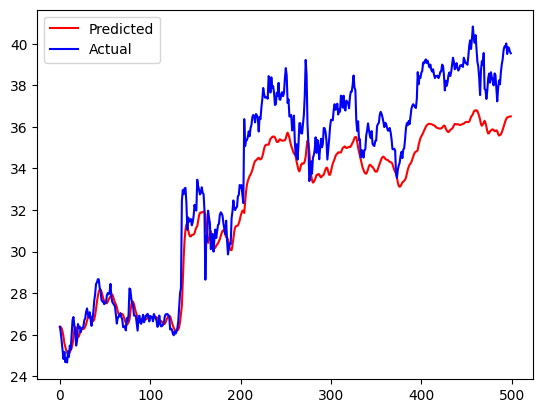

In [ ]:
# Installation and library imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Check TensorFlow setup
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow Version: ", tf.__version__)

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for LSTM input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))

# Build the LSTM model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units = 100, activation = 'tanh', return_sequences = True, input_shape = (100,1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 100, activation = 'tanh', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 120, activation = 'tanh', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 140, activation = 'tanh'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 1))

# Compile and summarize the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()


# LSTM - relu activation function

Num GPUs Available:  1
TensorFlow Version:  2.17.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 120)            │         106,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 140)                 │         146,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             141 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,581 (1.43 MB)

 Trainable params: 373,581 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - loss: 0.0725
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0035
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0030
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0032
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0024
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0027
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0030
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0024
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0024
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0021
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0019
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0018
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0020
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0023
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0018
E

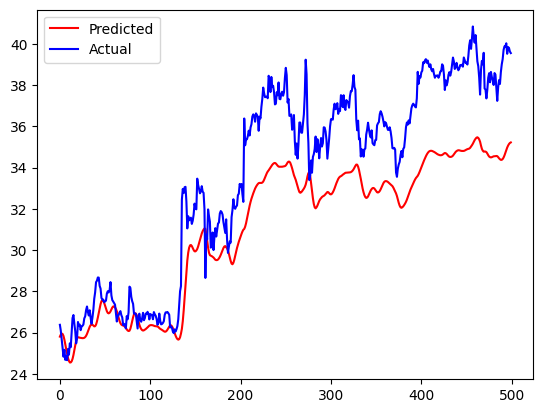

In [ ]:
# Installation and library imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Check TensorFlow setup
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow Version: ", tf.__version__)

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for LSTM input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))

# Build the LSTM model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units = 100, activation = 'relu', return_sequences = True, input_shape = (100,1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 140, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 1))

# Compile and summarize the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()

# CNN - relu activation function

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 47, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │         188,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,505 (834.00 KB)

 Trainable params: 213,505 (834.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0363
Epoch 2/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0059
Epoch 3/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 4/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 5/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 6/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 7/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 8/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 9/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 10/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 11/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 12/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 13/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 14/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 15/80
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 16/80
79/79 

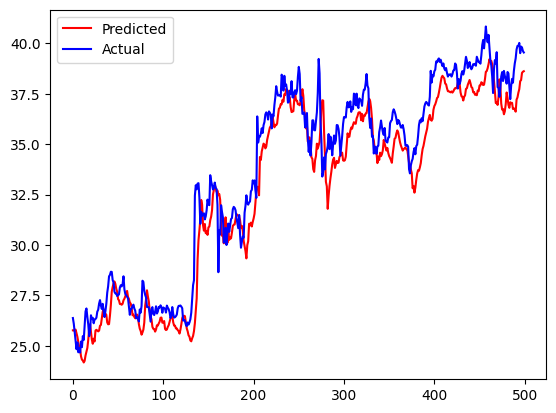

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for CNN input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for CNN input

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)  # Linear activation
])



# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=80, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_18 (LSTM)            │ (None, 100, 128)       │         66,560 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_18 (Conv1D)        │ (None, 99, 64)         │            192 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 100, 128)       │              0 │ lstm_18[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_19 (Conv1D)        │ (None, 98, 128)        │         16,512 │ conv1d_18[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_19 (LSTM)            │ (None, 128)            │        131,584 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 12544)          │              0 │ conv1d_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 12672)          │              0 │ lstm_19[0][0],         │
│ (Concatenate)             │                        │                │ flatten_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 128)            │      1,622,144 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 128)            │              0 │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 64)             │          8,256 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 1)              │             65 │ dense_18[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,845,313 (7.04 MB)

 Trainable params: 1,845,313 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5801
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.5849e-04
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.9785e-04
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5782e-04
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.4314e-04
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7427e-04
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.0838e-04
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.6227e-04
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.2207e-04
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 

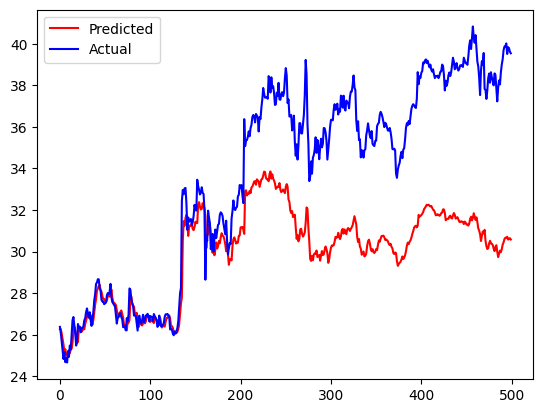

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(128, activation='tanh', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(128, activation='tanh', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(128, activation='tanh')(combined)
combined = Dropout(0.2)(combined)
combined = Dense(64, activation='tanh')(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50)

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 58, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 27, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         106,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,585 (514.00 KB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0397
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029
Epoch 14/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 15/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epo

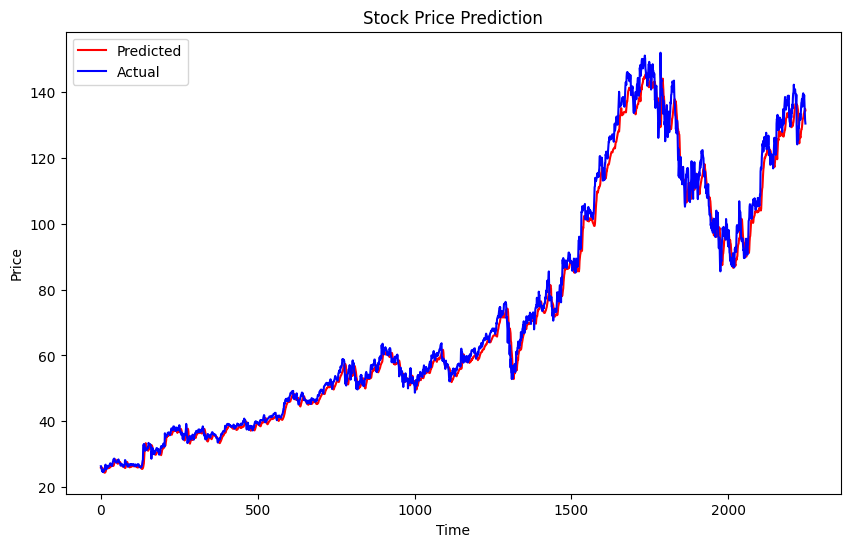

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for CNN input
x_train, y_train = [], []
sequence_length = 60  # Adjusted sequence length
for i in range(len(training_set_scaled) - sequence_length):
    x_train.append(training_set_scaled[i:i+sequence_length, 0])
    y_train.append(training_set_scaled[i+sequence_length, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  # Reshape for CNN input

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)  # Linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - sequence_length:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(len(testing_data)):
    x_test.append(total_inputs[i:i+sequence_length, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set, color='blue', label='Actual')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_16 (LSTM)            │ (None, 100, 128)       │         66,560 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 99, 64)         │            192 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 100, 128)       │              0 │ lstm_16[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_17 (Conv1D)        │ (None, 98, 128)        │         16,512 │ conv1d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_17 (LSTM)            │ (None, 128)            │        131,584 │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_8 (Flatten)       │ (None, 12544)          │              0 │ conv1d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_8             │ (None, 12672)          │              0 │ lstm_17[0][0],         │
│ (Concatenate)             │                        │                │ flatten_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 64)             │        811,072 │ concatenate_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 64)             │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 1)              │             65 │ dropout_16[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,025,985 (3.91 MB)

 Trainable params: 1,025,985 (3.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - loss: 0.0317
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0057
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0046
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0045
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0044
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0040
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0037
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0030
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0031
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0031
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0045
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0025
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0025
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0026
Epo

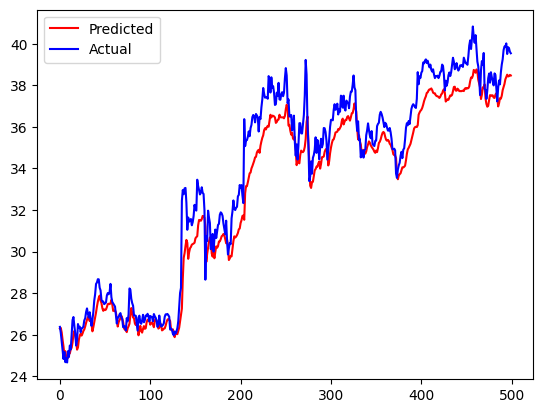

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(128, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(128, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50)

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()


Added early stopping

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_20 (LSTM)            │ (None, 100, 128)       │         66,560 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_20 (Conv1D)        │ (None, 99, 64)         │            192 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 100, 128)       │              0 │ lstm_20[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_21 (Conv1D)        │ (None, 98, 128)        │         16,512 │ conv1d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_21 (LSTM)            │ (None, 128)            │        131,584 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 12544)          │              0 │ conv1d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 12672)          │              0 │ lstm_21[0][0],         │
│ (Concatenate)             │                        │                │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 64)             │        811,072 │ concatenate_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 64)             │              0 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 1)              │             65 │ dropout_20[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,025,985 (3.91 MB)

 Trainable params: 1,025,985 (3.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.1042
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0077
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0060
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0055
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0064
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0044
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0042
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0046
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0043
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0049
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0038
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0035
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0033
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0034
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0033
Epoc

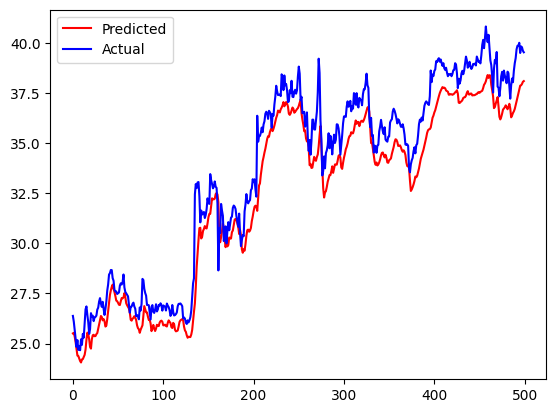

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(128, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(128, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()

Decrease LSTM

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_22 (LSTM)            │ (None, 100, 80)        │         26,240 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_22 (Conv1D)        │ (None, 99, 64)         │            192 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 100, 80)        │              0 │ lstm_22[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_23 (Conv1D)        │ (None, 98, 128)        │         16,512 │ conv1d_22[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_23 (LSTM)            │ (None, 80)             │         51,520 │ dropout_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_11 (Flatten)      │ (None, 12544)          │              0 │ conv1d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_11            │ (None, 12624)          │              0 │ lstm_23[0][0],         │
│ (Concatenate)             │                        │                │ flatten_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 64)             │        808,000 │ concatenate_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 64)             │              0 │ dense_22[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │             65 │ dropout_22[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 902,529 (3.44 MB)

 Trainable params: 902,529 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0989
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0063
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0049
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0046
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0044
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0041
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0040
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0037
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0039
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0037
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0041
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0034
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0033
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0029
Epo

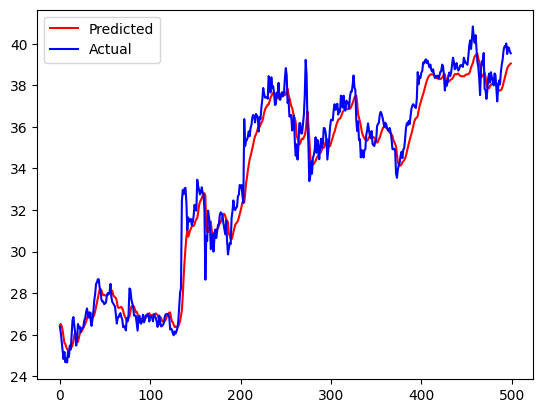

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(80, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(80, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()

Increase CNN to fit properly


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_24 (LSTM)            │ (None, 100, 80)        │         26,240 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 99, 128)        │            384 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_23 (Dropout)      │ (None, 100, 80)        │              0 │ lstm_24[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_25 (Conv1D)        │ (None, 98, 256)        │         65,792 │ conv1d_24[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_25 (LSTM)            │ (None, 80)             │         51,520 │ dropout_23[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 25088)          │              0 │ conv1d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 25168)          │              0 │ lstm_25[0][0],         │
│ (Concatenate)             │                        │                │ flatten_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 64)             │      1,610,816 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_24 (Dropout)      │ (None, 64)             │              0 │ dense_24[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 1)              │             65 │ dropout_24[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,754,817 (6.69 MB)

 Trainable params: 1,754,817 (6.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 0.0405
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0052
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0041
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0037
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0034
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0036
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0034
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0033
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0038
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0030
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0028
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0024
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0023
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0024
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0026
Epo

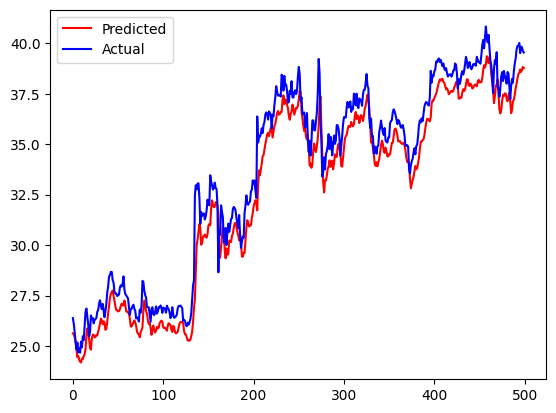

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(80, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(80, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=256, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(0, 500):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((500, 100, 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set[:500], color='blue', label='Actual')
plt.legend()
plt.show()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_46 (LSTM)            │ (None, 100, 32)        │          4,352 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_46 (Conv1D)        │ (None, 99, 128)        │            384 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_45 (Dropout)      │ (None, 100, 32)        │              0 │ lstm_46[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_47 (Conv1D)        │ (None, 98, 256)        │         65,792 │ conv1d_46[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_47 (LSTM)            │ (None, 32)             │          8,320 │ dropout_45[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_23 (Flatten)      │ (None, 25088)          │              0 │ conv1d_47[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_23            │ (None, 25120)          │              0 │ lstm_47[0][0],         │
│ (Concatenate)             │                        │                │ flatten_23[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_46 (Dense)          │ (None, 64)             │      1,607,744 │ concatenate_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_46 (Dropout)      │ (None, 64)             │              0 │ dense_46[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_47 (Dense)          │ (None, 1)              │             65 │ dropout_46[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,686,657 (6.43 MB)

 Trainable params: 1,686,657 (6.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0285
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0063
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0052
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0055
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0044
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0042
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0042
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0054
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0035
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0033
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0035
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0029
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0028
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0030
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028
Epoc

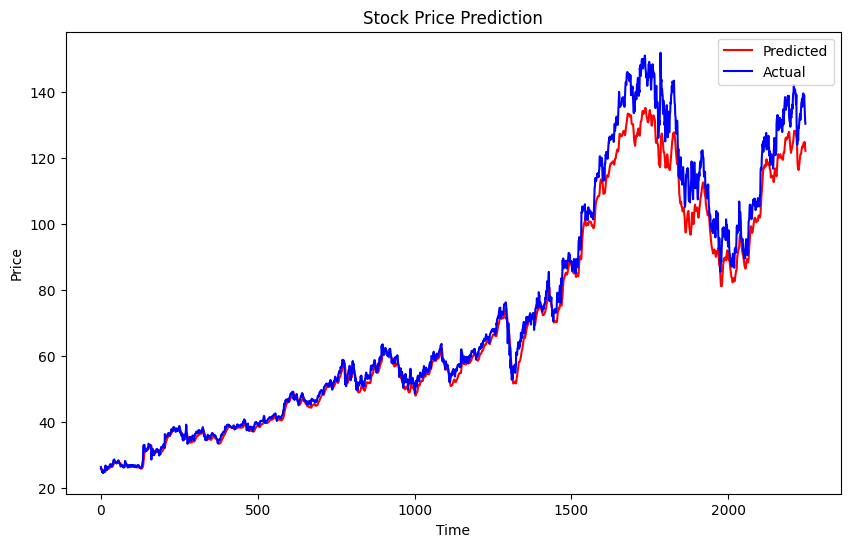

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(32, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(32, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=256, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(len(testing_data)):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set, color='blue', label='Actual')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 100, 16)        │          1,152 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 99, 128)        │            384 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 100, 16)        │              0 │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 98, 256)        │         65,792 │ conv1d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 16)             │          2,112 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 25088)          │              0 │ conv1d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 25104)          │              0 │ lstm_7[0][0],          │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │      1,606,720 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 64)             │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,676,225 (6.39 MB)

 Trainable params: 1,676,225 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0544
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0046
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0051
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0041
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0033
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0032
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0035
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0032
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0029
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0026
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0024
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0024
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0024
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0020
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0026
Epo

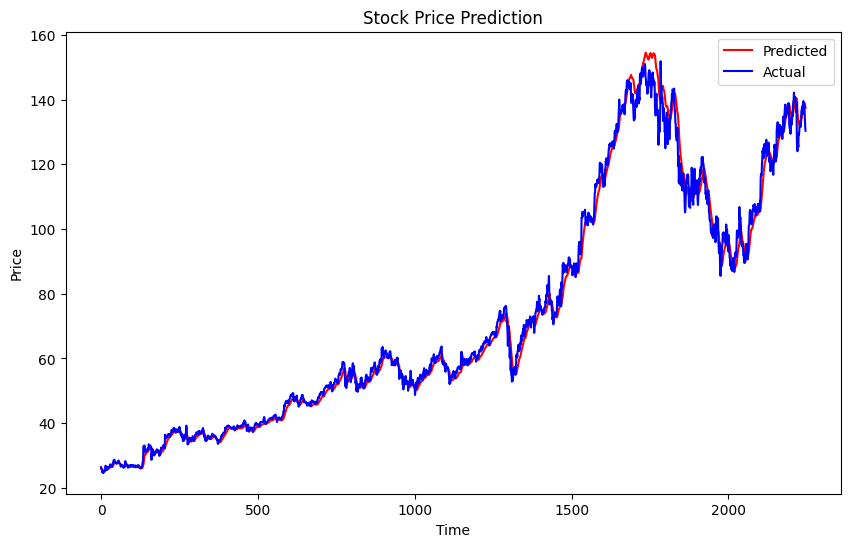

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('GOOG.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(16, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(16, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=128, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=256, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(len(testing_data)):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set, color='blue', label='Actual')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 100, 16)        │          1,152 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 99, 200)        │            600 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 100, 16)        │              0 │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 98, 256)        │        102,656 │ conv1d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 16)             │          2,112 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 25088)          │              0 │ conv1d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 25104)          │              0 │ lstm_7[0][0],          │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │      1,606,720 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 64)             │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             65 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,713,305 (6.54 MB)

 Trainable params: 1,713,305 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0655
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0065
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0064
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0049
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0055
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0050
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0047
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0050
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0048
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0046
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0040
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0035
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0042
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0035
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0039
Epo

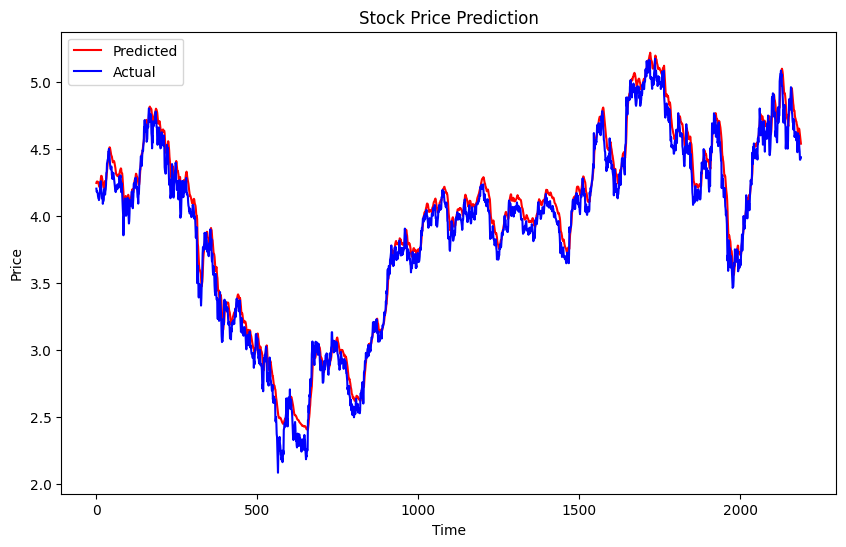

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('IBM.csv')

# Split data into training and testing sets
training_data = df.iloc[:2611]
testing_data = df.iloc[2611:4800]

# Extract the 'Open' column and scale data
training_set = training_data.iloc[:, 1:2].values
testing_set = testing_data.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create sequences for hybrid input
x_train, y_train = [], []
for i in range(0, 2511):
    x_train.append(training_set_scaled[i:i+100, 0])
    y_train.append(training_set_scaled[i+100, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((2511, 100, 1))  # Reshape for both LSTM and CNN

# Define hybrid model
input_layer = Input(shape=(100, 1))

# LSTM Branch
lstm_branch = LSTM(16, activation='relu', return_sequences=True)(input_layer)
lstm_branch = Dropout(0.2)(lstm_branch)
lstm_branch = LSTM(16, activation='relu', return_sequences=False)(lstm_branch)

# CNN Branch
cnn_branch = Conv1D(filters=200, kernel_size=2, activation='relu')(input_layer)
cnn_branch = Conv1D(filters=256, kernel_size=2, activation='relu')(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Fusion Layer
combined = concatenate([lstm_branch, cnn_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.2)(combined)

# Output Layer
output_layer = Dense(1)(combined)

# Build and compile the model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='mean_squared_error')
hybrid_model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the hybrid model
hybrid_model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopping])

# Prepare testing data for prediction
total = pd.concat((training_data['Open'], testing_data['Open']), axis=0)
total_inputs = total[len(total) - len(testing_data) - 100:].values
total_inputs = total_inputs.reshape(-1, 1)
total_inputs = sc.transform(total_inputs)

x_test = []
for i in range(len(testing_data)):
    x_test.append(total_inputs[i:i+100, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
predictions = hybrid_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red', label='Predicted')
plt.plot(testing_set, color='blue', label='Actual')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()